# Lakeshore datalogger

This program will hopefully do some realtime data logging and help get Fry working at peak potential. The usage is simple.

Step 1: Put the file name in the `filename` variable. This will have `<currenttime>.csv` appended to it, so just give us the path to a directory and it will work. 

Step 2: Run the first code cell

Sept 3: Take the printed out resource that you want and put it in the `device_ID` variable at the top of the next cell. Run the next two cells and you will continue without incident!

To hault the program, just send an interupt!

In [1]:
filename = "./datalogging/testing"



import matplotlib.pyplot as plt # Used for plotting
from IPython import display # Lets the graphs update in real time
from LS331 import LS331 as ls  # Lakeshore module
from datetime import datetime # For files
import time # S L E E P oh and also that thing to 

# Get the controller
lakesh = ls()
print(lakesh.getResources())

('ASRL/dev/ttyUSB0::INSTR',)


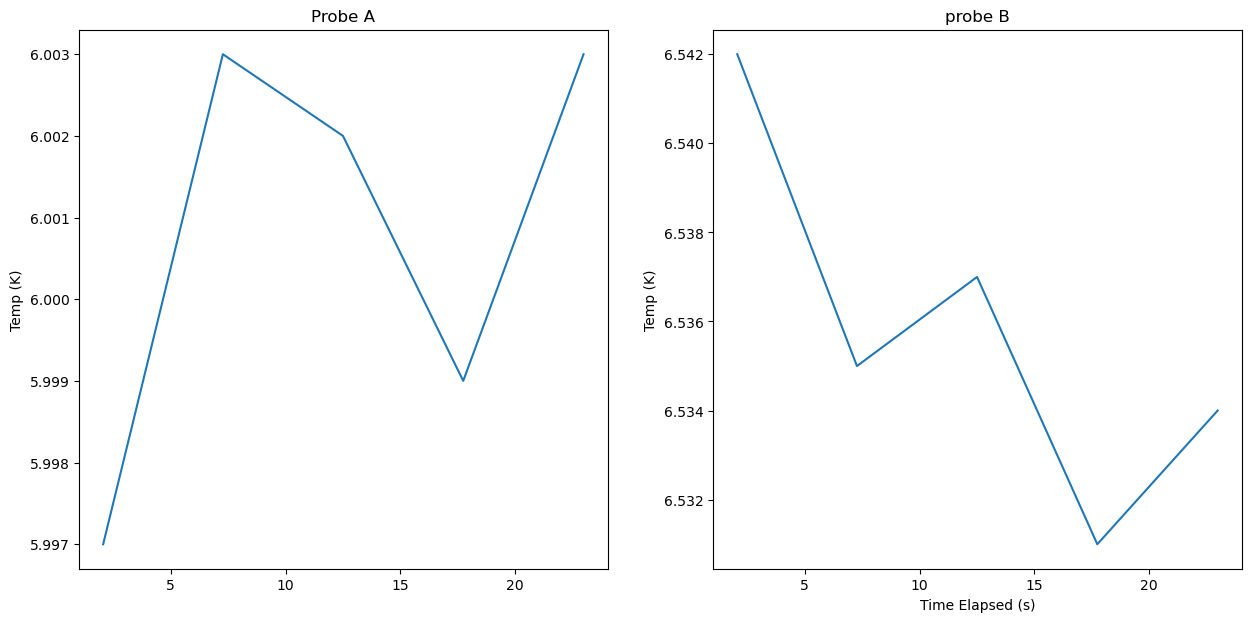

In [13]:
device_ID = "ASRL/dev/ttyUSB0"
filename = "./datalogging/testing"

sampletime = 5
# Connect to controller
lakesh.connect(devicePath = device_ID)
#Define filename
filename = filename + datetime.now().strftime("%y%m%d-%h%m%s")+".csv"
# Open file and write header
file = open(filename, mode='w')
file.write("time,tempA,tempB\n")
# Set up some lists 
readtime = []
tempA = []
tempB = []
# Used for the output file
t0 = time.time()
# Now we enter the loop! The Try/except lets us get out of it with an interupt!
try: 
    while True:
        # Reads the temps and stores it into lists. Lists are only used for plotting. 
        temps = lakesh.queryTemp()
        if temps[0] == 'NaN' or temps[1] == 'NaN': continue
        readtime.append(time.time()-t0)

        tempA.append(float(temps[0]))
        tempB.append(float(temps[1]))
        
        #This does the file writing. I am manually formatting my csv because I don't need anything too complex. 
        file.write(f"{readtime[-1]:.1f},{temps[0]},{temps[1]}\n")
        
        # This will do the plotting
        fig, (ax1, ax2) = plt.subplots(1,2, sharex=True, figsize=(15,7))
        ax1.plot(readtime, tempA, label="Probe A")
        ax2.plot(readtime, tempB, label="Probe B")
        ax2.set_xlabel("Time Elapsed (s)")
        ax1.set_title("Probe A")
        ax2.set_title("probe B")
        ax1.set_ylabel("Temp (K)")
        ax2.set_ylabel("Temp (K)")
        
        # This displays the current temperature
        print(f"Time: {readtime[-1]:.0f}, Temp A: {temps[0]}, Temp B: {temps[1]}", end="\r")
        plt.show()
        
        print(f"Time: {readtime[-1]:.0f}, Temp A: {temps[0]}, Temp B: {temps[1]}", end="\r")
        time.sleep(sampletime)
        display.clear_output(wait=True)
        
        
except KeyboardInterrupt:
    file.close()
    lakesh.closeConnection()
